<a href="https://colab.research.google.com/github/pathilink/programaria_analise_dados/blob/main/notebooks/analise_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uso da biblioteca Pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

In [12]:
dados = pd.read_excel('/content/drive/MyDrive/PrograMaria/analise_dados/data/planilha_modulo3.xlsx', index_col=0)
dados.sample(3)

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
3004,aw6oftd5e83h2adjkiaw6ofi9u3gmsfb,35.0,35-39,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,Varejo,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,11012.0
1705,lolcvck57fhvaa52qlpy1lolcvck6kjn,27.0,25-29,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,Marketing,de 101 a 500,0.0,NaN,Analista de Dados/Data Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,de 1 a 2 anos,de 1 a 2 anos,3144.0
86,zehbwpq0cu27mcdfzehbwumsktj37ut5,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,Tecnologia/Fábrica de Software,Acima de 3.000,0.0,NaN,Analytics Engineer,Sênior,de R$ 20.001/mês a R$ 25.000/mês,Mais de 10 anos,Menos de 1 ano,24224.0


In [13]:
dados.shape

(4271, 27)

In [14]:
len(dados)

4271

In [15]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')

In [16]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4271 entries, 0 to 4270
Data columns (total 27 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   ID                                                                                                                         4271 non-null   object 
 1   IDADE                                                                                                                      4197 non-null   float64
 2   FAIXA IDADE                                                                                                                4271 non-null   object 
 3   GENERO                                                                                                                     4262 non-n

In [17]:
dados.describe()

,IDADE,MUDOU DE ESTADO?,GESTOR?,SALARIO
count,4197.000000,4171.000000,3694.000000,3694.000000
mean,31.169168,0.806281,0.193016,10969.266919
std,6.902803,0.395258,0.394719,19419.753189
min,18.000000,0.000000,0.000000,35.000000
25%,26.000000,1.000000,0.000000,4269.500000
50%,30.000000,1.000000,0.000000,7625.500000
75%,35.000000,1.000000,0.000000,12778.500000
max,54.000000,1.000000,1.000000,485191.000000


# Repetindo análise do excel

In [18]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')

In [28]:
dados[dados['GENERO'] == 'Feminino']

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Ceará (CE),...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio Grande do Sul (RS),...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Bahia (BA),...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio de Janeiro (RJ),...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio Grande do Sul (RS),...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,Minas Gerais (MG),...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,Minas Gerais (MG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,São Paulo (SP),...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


In [29]:
dados[dados['GENERO'] != 'Masculino']

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Ceará (CE),...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio Grande do Sul (RS),...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Bahia (BA),...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio de Janeiro (RJ),...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio Grande do Sul (RS),...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,Minas Gerais (MG),...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,Minas Gerais (MG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,São Paulo (SP),...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


In [30]:
dados[dados['GENERO'].str.contains('não', na=False)]

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
562,vhuw8xnpbmj6oh20xovhuwcbdl4a12ni,29.0,25-29,Prefiro não informar,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,n2ktdn33istvlu1ha4v3kn2ktdn1rsp1,NaN,55+,Prefiro não informar,Indígena,Prefiro não informar,Não acredito que minha experiência profissiona...,NaN,True,NaN,...,Setor Público,de 51 a 100,0.0,NaN,Analista de Suporte/Analista Técnico,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Menos de 1 ano,826.0
1913,k3as6jdh3w4jf4ztsw4kpkk3as6jdy19,30.0,30-34,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,Outra Opção,de 101 a 500,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,de 3 a 4 anos,11476.0
1925,jzppdwep2kpisqjjzppdh304v83cj7eu,NaN,17-21,Prefiro não informar,Prefiro não informar,Prefiro não informar,"Sim, acredito que minha experiência profission...",Quantidade de oportunidades de emprego/vagas r...,False,NaN,...,Setor Farmaceutico,de 1 a 5,0.0,NaN,Outra Opção,Júnior,de R$ 2.001/mês a R$ 3.000/mês,de 1 a 2 anos,Menos de 1 ano,2294.0
2554,f5l206z0hr9uh3nz2iiff5l206c0g10o,20.0,17-21,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,Setor Público,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,de 1 a 2 anos,1339.0
3090,a6ugmsw7s8hu5aa6uglio5apj74fam9o,26.0,25-29,Prefiro não informar,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio Grande do Norte (RN),...,Educação,de 101 a 500,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,11545.0
3357,7q0icczxn0l3a894cbx7q0icczjyud0n,29.0,25-29,Prefiro não informar,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio de Janeiro (RJ),...,Tecnologia/Fábrica de Software,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 6.001/mês a R$ 8.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,6345.0
3493,6m8haop6lxnaizpwij6m8haopiax98jg,25.0,25-29,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,São Paulo (SP),...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 3 a 4 anos,Menos de 1 ano,3900.0
3610,5mloglozmr0r715mntaxbt6xy8b5olmb,30.0,30-34,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Velocidade de progressão de carreira,True,São Paulo (SP),...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 8.001/mês a R$ 12.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,10174.0
4171,0rksyxnqhn13nwytwi6y0rkssx6jmodf,26.0,25-29,Prefiro não informar,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,Outra Opção,de 1.001 a 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Menos de 1 ano,10517.0


In [32]:
dados[dados['IDADE'] >= 30]

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Ceará (CE),...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Piauí (PI),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4261,02xomoejng6c9152kde02xomww412qpg,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,Rio Grande do Sul (RS),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4262,02vlm03c29g3fcys8tj06102vlm0983h,31.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,Tecnologia/Fábrica de Software,de 501 a 1.000,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 3 a 4 anos,de 3 a 4 anos,18402.0
4264,028mfisr3mqazkn5n6swe028mt55nqzq,37.0,35-39,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,Tecnologia/Fábrica de Software,de 51 a 100,1.0,Gerente/Head,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 3 a 4 anos,Mais de 10 anos,24543.0


In [34]:
dados[(dados['IDADE'] > 30) & (dados['GENERO'] == 'Feminino')]

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Ceará (CE),...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio Grande do Sul (RS),...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
14,zwez49k0jhdvfkfst4zwef137uuf4ivy,35.0,35-39,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,São Paulo (SP),...,Varejo,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Pleno,de R$ 6.001/mês a R$ 8.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,7416.0
23,zuqfcwtl9unfc5ezuqfcwm8coytsp5ap,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Rio de Janeiro (RJ),...,Tecnologia/Fábrica de Software,de 501 a 1.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 12.001/mês a R$ 16.000/mês,Mais de 10 anos,de 5 a 6 anos,13418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4214,0gprow0ownrbfneftxf0gprow4kyrqdy,41.0,40-44,Feminino,Branca,Prefiro não informar,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,São Paulo (SP),...,Seguros ou Previdência,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,11452.0
4221,0fgi5bnb0u9b0fgc0jmqlbnvtu12b76d,34.0,30-34,Feminino,Outra,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,Área de Consultoria,de 51 a 100,0.0,NaN,Outra Opção,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5687.0
4240,0a5xgxb1ljmuqn0un8a10a5xg4eufs2l,37.0,35-39,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,Sergipe (SE),...,Finanças ou Bancos,de 51 a 100,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,Menos de 1 ano,1182.0
4247,07qzabp4ujpe4oz81udmb07qzabp4h0t,34.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Ceará (CE),...,Setor de Energia,de 11 a 50,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 4.001/mês a R$ 6.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,5925.0


## Exercício

📌 Que tal fazer um fitro para identificar pessoas que se declararam amarelas e outro de pessoas abaixo de 40 anos? E melhor, um filtro que misture ambos?😉



In [35]:
dados[dados['COR/RACA/ETNIA'] == 'Amarela'].sample(3)

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
1162,qcblsjb6eol3b7uqcblsjl4qvd3z1cev,38.0,35-39,Feminino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,Varejo,Acima de 3.000,0.0,NaN,Analista de Negócios/Business Analyst,Sênior,de R$ 8.001/mês a R$ 12.000/mês,de 4 a 6 anos,de 1 a 2 anos,11159.0
1685,ltqw1mj554d7025h4huvltqwincf22ob,31.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,Seguros ou Previdência,de 11 a 50,1.0,Gerente/Head,NaN,NaN,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Menos de 1 ano,14391.0
1832,kp24gz9brxei3nedpc1cjckp24xq3dsg,24.0,22-24,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 1 a 2 anos,4606.0


In [36]:
dados[dados['IDADE'] < 40].sample(3)

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
390,x0dip7m5jym19x0dbef955bfocji0ybe,26.0,25-29,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...","Velocidade de progressão de carreira, Seniorid...",True,São Paulo (SP),...,Internet/Ecommerce,de 101 a 500,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,de 1 a 2 anos,5459.0
2662,e5u1z4g00c6he5u16nxgh97aofg37vav,35.0,35-39,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,Outra Opção,Acima de 3.000,1.0,Diretor/VP,NaN,NaN,Acima de R$ 40.001/mês,Mais de 10 anos,Mais de 10 anos,70088.0
3881,3d1uxdilpscf3d1ux2f1ubys3a50kcur,35.0,35-39,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,Pernambuco (PE),...,Varejo,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2405.0


In [37]:
dados[(dados['COR/RACA/ETNIA'] == 'Amarela') & (dados['IDADE'] < 40)].sample(3)

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
1887,kamzmrau7btzqv23lzzkamzmr5buk9q0,21.0,17-21,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,Outra Opção,de 101 a 500,0.0,NaN,Analista de Suporte/Analista Técnico,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,de 1 a 2 anos,2586.0
3947,2tnsh0gxdu3aq4z2d2tnsh0hk15brx7q,31.0,30-34,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,False,NaN,...,Tecnologia/Fábrica de Software,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 25.001/mês a R$ 30.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,29408.0
950,s61b599i2ow0ldgs6138n1taubo60hm8,36.0,35-39,Feminino,Amarela,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,São Paulo (SP),...,Varejo,de 501 a 1.000,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,10811.0


📌 Baixe o arquivo licitacoes.csv e verifique quantas licitações estão com a “Situação Licitação” igual a “Encerrado”.

In [44]:
licitacoes = pd.read_csv('/content/drive/MyDrive/PrograMaria/analise_dados/data/licitacoes.csv', delimiter=';', encoding='latin1')
licitacoes.sample(3)

,Número Licitação,Código UG,Nome UG,Código Modalidade Compra,Modalidade Compra,Número Processo,Objeto,Situação Licitação,Código Órgão Superior,Nome Órgão Superior,Código Órgão,Nome Órgão,UF,Município,Data Resultado Compra,Data Abertura,Valor Licitação
10369,1252018,135028,EMBRAPA/CNPF,6,Dispensa de Licitação,037/2018,Objeto: Aquisição de Consumíveis e Reagentes d...,Encerrado,22000,Ministério da Agricultura e Pecuária,22202,Empresa Brasileira de Pesquisa Agropecuária,PR,COLOMBO,04/12/2018,NaN,"5336,2700"
8410,792018,194045,FUNAI-COORDENACAO REGIONAL DO MADEIRA/AM,6,Dispensa de Licitação,08113.408/2018-53,"Objeto: Hospedagem em quarto simples/solteiro,...",Encerrado,84000,Ministério dos Povos Indígenas,30202,Fundação Nacional do Índio,AM,HUMAITA,19/12/2018,NaN,"8500,0000"
11167,1512018,160156,44 BATALHAO DE INFANTARIA MOTORIZADO,6,Dispensa de Licitação,64104008283201890,Objeto: Aquisição de Serviço de manutenção de ...,Encerrado,52000,Ministério da Defesa,52121,Comando do Exército,MT,CUIABA,07/12/2018,NaN,"6979,4800"


In [48]:
licitacoes[licitacoes['Situação Licitação'] == 'Encerrado'].count()

Número Licitação            9016
Código UG                   9016
Nome UG                     9016
Código Modalidade Compra    9016
Modalidade Compra           9016
Número Processo             9016
Objeto                      9016
Situação Licitação          9016
Código Órgão Superior       9016
Nome Órgão Superior         9016
Código Órgão                9016
Nome Órgão                  9016
UF                          9016
Município                   9016
Data Resultado Compra       9016
Data Abertura               1152
Valor Licitação             9016
dtype: int64

In [50]:
licitacoes['Situação Licitação'].value_counts()

Situação Licitação
Encerrado                         9016
Publicado                         3709
Evento de Resultado de Julgame    1922
Retificação                        127
Evento de Alteração Publicad        93
Evento de Suspensão Publicado       72
Anulação                            67
Revogação                           63
Divulgado                           55
Evento de Adiamento Publicado       46
Evento de Retificação Public        45
Evento de Revogação Publicad        40
Evento de Alteração de Resul        37
Evento de Anulação Publicado        18
Evento de Retificação Divulg         7
Inválido                             4
Evento de Habilitação Public         4
Evento de Alteração Divulgad         4
Evento de Reabertura de Prazo        4
Evento de Adiamento Divulgado        3
Name: count, dtype: int64

In [51]:
dados.groupby('GENERO')['ID'].nunique()

GENERO
Feminino                1055
Masculino               3194
Prefiro não informar      12
Name: ID, dtype: int64

In [52]:
dados.groupby('GENERO', dropna=False)['ID'].nunique()

GENERO
Feminino                1055
Masculino               3194
Prefiro não informar      12
NaN                        9
Name: ID, dtype: int64

In [53]:
dados['GENERO'].value_counts(dropna=False)

GENERO
Masculino               3194
Feminino                1056
Prefiro não informar      12
NaN                        9
Name: count, dtype: int64

In [54]:
dados[dados['IDADE'] > 30]['NIVEL'].value_counts()

NIVEL
Sênior    525
Pleno     408
Júnior    274
Name: count, dtype: int64

In [55]:
dados[(dados['IDADE'] > 30) & (dados['GENERO'] == 'Feminino')]['NIVEL'].value_counts()

NIVEL
Pleno     117
Sênior    114
Júnior     96
Name: count, dtype: int64

In [57]:
pd.pivot_table(dados, values=['ID'], index=['GENERO'], columns=['GESTOR?'], aggfunc='count')

ID     
GESTOR?                0.0  1.0
GENERO                         
Feminino               754  132
Masculino             2212  578
Prefiro não informar     9    2

# Estatística Básica

In [58]:
import numpy as np

In [59]:
lista_idades = [26, 30, 32, 22, 26, 35, 40, 20, 43, 31, 23]

In [60]:
np.sum(lista_idades)

328

In [61]:
len(lista_idades)

11

In [62]:
np.sum(lista_idades) / len(lista_idades)

29.818181818181817

In [65]:
media = np.mean(lista_idades)
print("Média aritmética:", media)

Média aritmética: 29.818181818181817


In [68]:
lista_idades.sort()
lista_idades

[20, 22, 23, 26, 26, 30, 31, 32, 35, 40, 43]

In [70]:
lista_idades = [26, 30, 32, 22, 26, 35, 40, 20, 43, 31, 23, 100]
lista_idades.sort()
lista_idades

[20, 22, 23, 26, 26, 30, 31, 32, 35, 40, 43, 100]

In [72]:
mediana = np.median(lista_idades)
mediana

30.5

Voltando para a tabela

In [73]:
dados['IDADE'].mean()

31.169168453657374

In [74]:
dados['IDADE'].median()

30.0

In [75]:
dados['IDADE'].mode()

0    27.0
Name: IDADE, dtype: float64

In [76]:
dados['IDADE'].std()

6.902802832143122

In [77]:
dados['IDADE'].min()

18.0

In [78]:
dados['IDADE'].max()

54.0

In [80]:
dados[dados['GENERO'] == 'Feminino']['IDADE'].mean()

31.318051575931232

In [81]:
dados[dados['GENERO'] == 'Feminino']['SALARIO'].mean()

8673.22460496614

📌Que tal um desafio? Faça a média da idade de quem respondeu ser do gênero masculino, assim como as estatísticas da coluna de salário😉

In [84]:
dados[dados['GENERO'] == 'Masculino']['IDADE'].mean()

31.147876077930373

In [83]:
dados[dados['GENERO'] == 'Masculino']['SALARIO'].mean()

11724.552688172043

# Valores faltantes

In [85]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4271 entries, 0 to 4270
Data columns (total 27 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   ID                                                                                                                         4271 non-null   object 
 1   IDADE                                                                                                                      4197 non-null   float64
 2   FAIXA IDADE                                                                                                                4271 non-null   object 
 3   GENERO                                                                                                                     4262 non-n

### Trabalhando coluna gênero

In [86]:
dados.groupby('GENERO', dropna=False)['ID'].nunique()

GENERO
Feminino                1055
Masculino               3194
Prefiro não informar      12
NaN                        9
Name: ID, dtype: int64

In [87]:
dados['GENERO'] = dados['GENERO'].fillna('Prefiro não informar')

dados.groupby('GENERO', dropna=False)['ID'].nunique()

GENERO
Feminino                1055
Masculino               3194
Prefiro não informar      21
Name: ID, dtype: int64

### Trabalhando coluna idade

In [88]:
dados['IDADE'].isnull().value_counts()

IDADE
False    4197
True       74
Name: count, dtype: int64

In [89]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

FAIXA IDADE
55+      68
17-21     6
Name: count, dtype: int64

In [90]:
media_17_21 = dados[dados['FAIXA IDADE'] == '17-21']['IDADE'].mean()
media_17_21

20.205479452054796

In [93]:
dados.loc[(dados['FAIXA IDADE'] == '17-21') & (dados['IDADE'].isnull()), 'IDADE'] = media_17_21

In [94]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

FAIXA IDADE
55+    68
Name: count, dtype: int64

In [98]:
dados[dados['FAIXA IDADE'] == '55+']['IDADE']#.mean()

9      NaN
66     NaN
96     NaN
121    NaN
156    NaN
        ..
4001   NaN
4043   NaN
4048   NaN
4061   NaN
4215   NaN
Name: IDADE, Length: 68, dtype: float64

In [99]:
dados[dados['FAIXA IDADE'] == '55+']['NIVEL']

9        Pleno
66      Júnior
96       Pleno
121      Pleno
156     Júnior
         ...  
4001       NaN
4043       NaN
4048       NaN
4061       NaN
4215    Sênior
Name: NIVEL, Length: 68, dtype: object

In [101]:
media_geral = dados['IDADE'].mean()
media_geral

31.153517220250375

In [103]:
dados.loc[(dados['FAIXA IDADE'] == '55+') & (dados['IDADE'].isnull()), 'IDADE'] = media_geral

In [104]:
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

Series([], Name: count, dtype: int64)

### Trabalhando coluna salário

In [105]:
dados[dados['SALARIO'].isnull()]

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
12,zwr9hqcpg513kaopenzwr9hibaqmldto,31.0,30-34,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,ztgepgj82o9oix0nztgepq2trcay6gpv,24.0,22-24,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Minas Gerais (MG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,zsa9i6njd3e594mw0tvlk4zsa9iw86i9,24.0,22-24,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,zr4b2vm7dapp3linwqwn7zr4b2vmagqx,32.0,30-34,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Bahia (BA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,zm7o5yquakof0j6zm7vh3o0letznhdvh,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Rio de Janeiro (RJ),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,09oxwp6lsdwhw09ox1uobuxa8cq2pzma,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4252,064pe9b1htw7mflhif064pe95dotv6yf,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,São Paulo (SP),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,Minas Gerais (MG),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Piauí (PI),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
dados[dados['SALARIO'].isnull()]['FAIXA SALARIAL'].value_counts()

Series([], Name: count, dtype: int64)

In [109]:
mediana_salario = dados['SALARIO'].median()

In [110]:
dados.loc[dados['SALARIO'].isnull(), 'SALARIO'] = mediana_salario

### Valores discrepantes (outliers)

In [113]:
lista_idades = [26, 30, 32, 22, 26, 35, 400, 20, 43, 31, 23]

In [117]:
media = np.mean(lista_idades)
media

62.54545454545455

In [118]:
desvio = np.std(lista_idades)
desvio

106.89532997398872

In [119]:
media + 3 * desvio

383.2314444674207

In [120]:
media - 3 * desvio

-258.1405353765116

In [121]:
import matplotlib.pyplot as plt

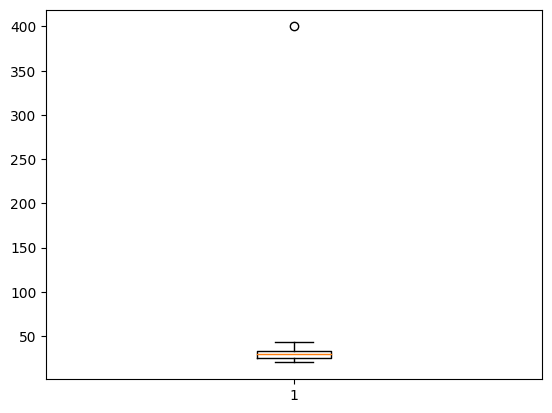

In [123]:
plt.boxplot(lista_idades);

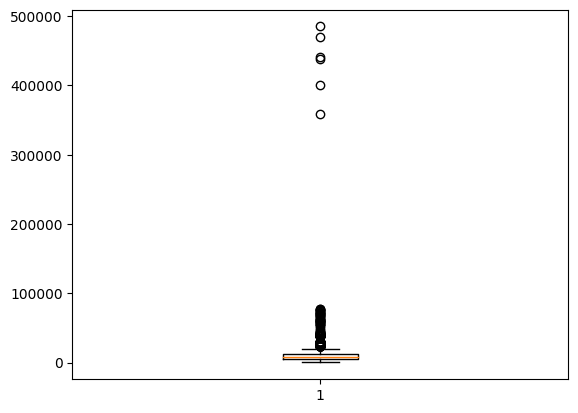

In [124]:
plt.boxplot(dados['SALARIO']);

In [125]:
q1 = dados['SALARIO'].quantile(0.25)
q1

4751.5

In [126]:
q3 = dados['SALARIO'].quantile(0.75)
q3

11794.5

In [127]:
iqr = q3 - q1
iqr

7043.0

In [129]:
lim_superior = q3 + (1.5 * iqr)
lim_superior

22359.0

In [130]:
lim_inferior = q1 - (1.5 * iqr)
lim_inferior

-5813.0

In [131]:
dados['FAIXA SALARIAL'].value_counts()

FAIXA SALARIAL
de R$ 8.001/mês a R$ 12.000/mês     752
de R$ 4.001/mês a R$ 6.000/mês      584
de R$ 6.001/mês a R$ 8.000/mês      527
de R$ 12.001/mês a R$ 16.000/mês    437
de R$ 3.001/mês a R$ 4.000/mês      303
de R$ 2.001/mês a R$ 3.000/mês      285
de R$ 16.001/mês a R$ 20.000/mês    229
de R$ 1.001/mês a R$ 2.000/mês      216
de R$ 20.001/mês a R$ 25.000/mês    134
de R$ 25.001/mês a R$ 30.000/mês     77
de R$ 30.001/mês a R$ 40.000/mês     70
Acima de R$ 40.001/mês               45
Menos de R$ 1.000/mês                35
Name: count, dtype: int64

In [132]:
media_salario = dados['SALARIO'].mean()
media_salario

10517.53348162023

In [133]:
desvio_salario = dados['SALARIO'].std()
desvio_salario

18096.21098911858

In [134]:
limite_superior = media_salario + (3 * desvio_salario)
limite_superior

64806.166448975964

In [135]:
limite_inferior = media_salario - (3 * desvio_salario)
limite_inferior

-43771.0994857355

In [137]:
dados[dados['SALARIO'] > limite_superior]['FAIXA SALARIAL'].value_counts()

FAIXA SALARIAL
Acima de R$ 40.001/mês              19
de R$ 30.001/mês a R$ 40.000/mês     3
Name: count, dtype: int64

In [140]:
media_30_40 = dados[(dados['FAIXA SALARIAL'] == 'de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO'] < limite_superior)]['SALARIO'].mean()
media_30_40

39002.19402985075

In [143]:
dados.loc[(dados['FAIXA SALARIAL'] == 'de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO'] > limite_superior), 'SALARIO'] = media_30_40

In [144]:
dados[dados['SALARIO'] > limite_superior]['FAIXA SALARIAL'].value_counts()

FAIXA SALARIAL
Acima de R$ 40.001/mês    19
Name: count, dtype: int64

In [145]:
media_acima_40 = dados[(dados['FAIXA SALARIAL'] == 'Acima de R$ 40.001/mês') & (dados['SALARIO'] < limite_superior)]['SALARIO'].mean()
print('Média acima de 40:', media_acima_40)

dados.loc[(dados['FAIXA SALARIAL'] == 'Acima de R$ 40.001/mês') & (dados['SALARIO'] > limite_superior), 'SALARIO'] = media_acima_40

Média acima de 40: 53127.846153846156


In [146]:
dados[dados['SALARIO'] > limite_superior]['FAIXA SALARIAL'].value_counts()

Series([], Name: count, dtype: int64)

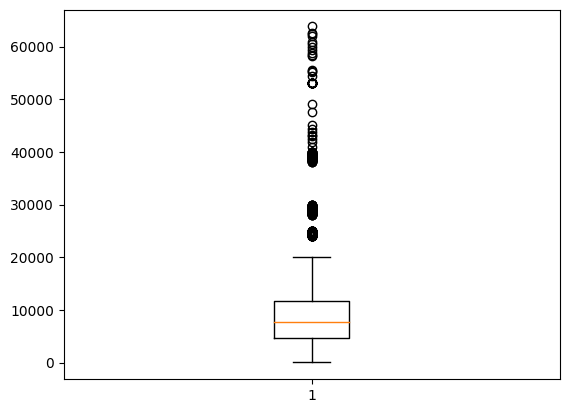

In [147]:
plt.boxplot(dados['SALARIO']);